In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Example: replace with your file path in Drive
df = pd.read_csv('/content/drive/MyDrive/DS_Projects/cleaned_air_quality_weather.csv')

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,city,co,no2,o3,so2,pm2_5,pm10,temperature,humidity,wind_speed,uv_index,precip
0,New Delhi,1411.85,23.95,264,76.65,137.25,140.05,21,53,4,0,0.0
1,Mumbai,644.85,25.55,209,31.15,46.65,47.05,30,35,18,0,0.0
2,Kolkata,457.85,1.95,214,12.95,44.55,47.25,21,73,8,0,0.0
3,Chennai,275.85,2.05,135,7.55,28.75,35.15,26,65,19,0,0.0
4,Bengaluru,243.85,3.85,152,10.75,20.95,26.35,24,25,9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,Solapur,265.85,2.15,179,14.15,20.45,21.55,31,22,10,0,0.0
70,Kolhapur,282.85,2.45,171,16.05,20.25,21.25,27,20,6,0,0.0
71,Sangli,331.85,18.45,39,23.35,9.75,10.25,-1,74,16,0,0.0
72,Satara,233.85,1.45,164,9.95,16.75,17.25,23,28,7,0,0.0


**Summary statistics**

In [7]:
pollutants = ['co','no2','o3','so2','pm2_5','pm10']
df[pollutants].describe()


,co,no2,o3,so2,pm2_5,pm10
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,526.498649,6.041892,169.256757,24.587838,48.952703,50.395946
std,355.657039,5.530903,40.386510,15.250463,41.487027,42.537311
min,132.850000,0.850000,39.000000,1.950000,5.750000,5.850000
25%,265.100000,2.150000,146.500000,13.675000,19.250000,20.400000
50%,333.850000,4.600000,163.500000,19.850000,26.800000,27.050000
75%,775.100000,8.300000,198.750000,31.150000,76.000000,80.250000
max,1591.850000,25.550000,264.000000,76.650000,138.250000,141.950000


**City-wise averages & bar plot**

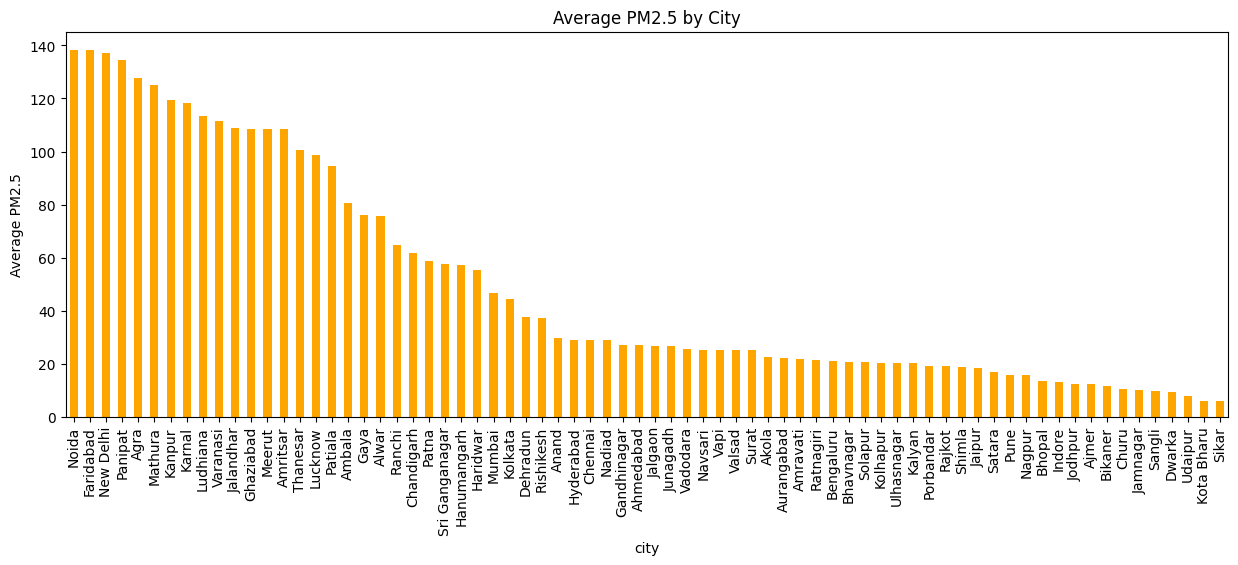

In [9]:
avg_pollutants = df.groupby('city')[pollutants].mean()

# Bar plot for PM2.5
import matplotlib.pyplot as plt

avg_pollutants['pm2_5'].sort_values(ascending=False).plot(kind='bar', figsize=(15,5), color='orange')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 by City')
plt.show()


**Correlation heatmap**

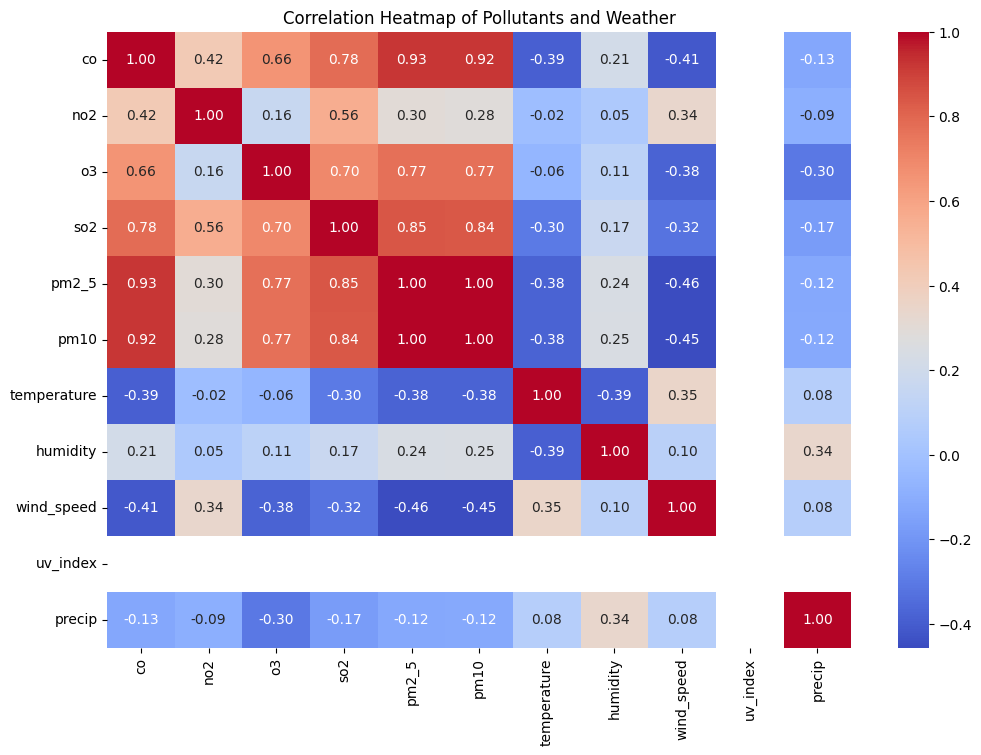

In [10]:
import seaborn as sns

numeric_cols = pollutants + ['temperature','humidity','wind_speed','uv_index','precip']
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants and Weather")
plt.show()


**Pairplot of pollutants**

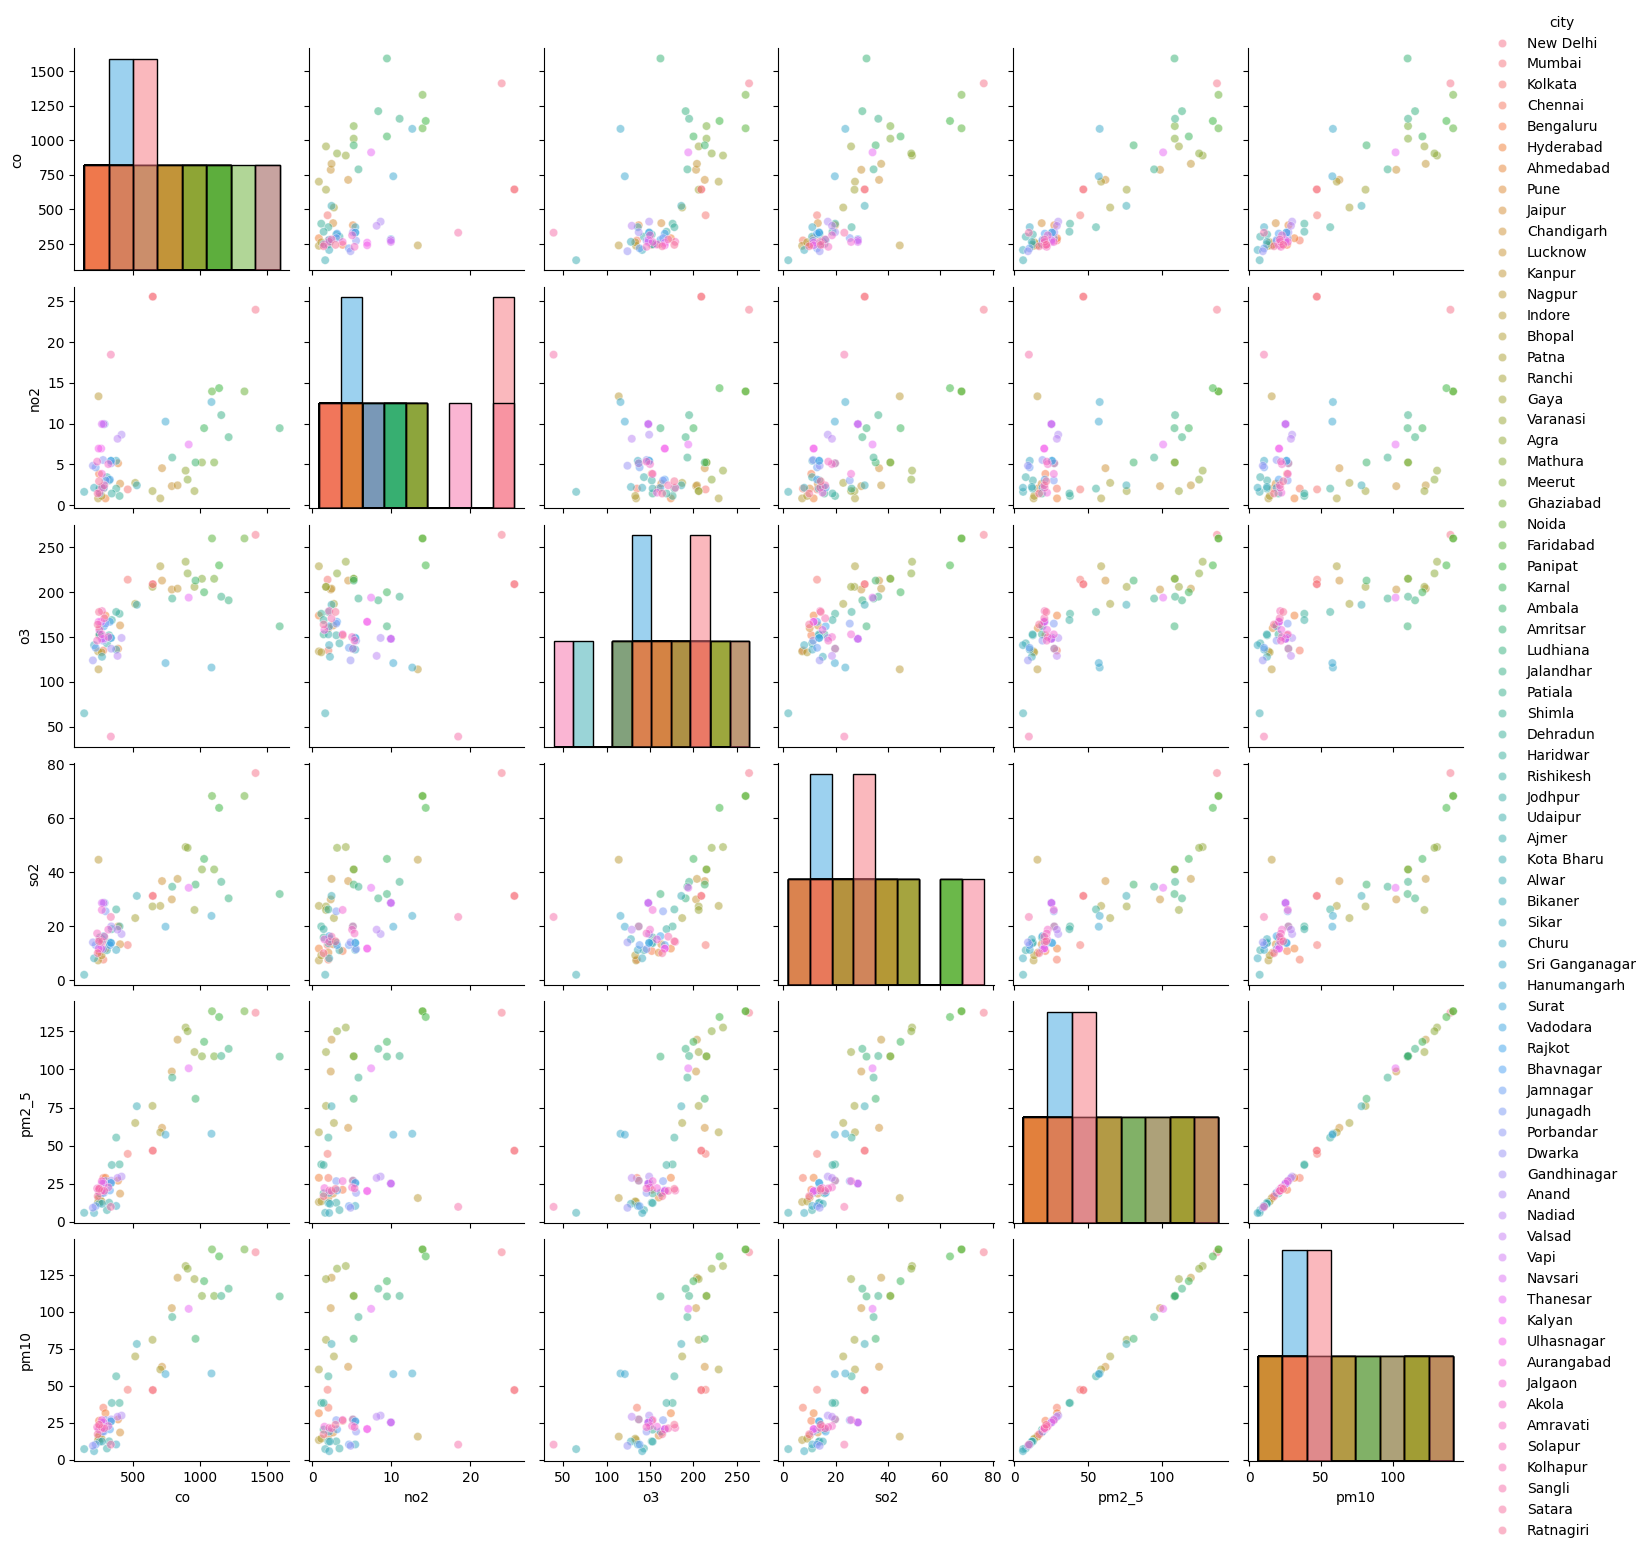

In [14]:
sns.pairplot(df, vars=pollutants, hue='city', diag_kind='hist', plot_kws={'alpha':0.5})
plt.show()


**Top polluted cities per pollutant**

In [16]:
# Average pollutant per city
avg_pollutants = df.groupby('city')[pollutants].mean()

# Top 3 cities for each pollutant
for col in pollutants:
    top_cities = avg_pollutants[col].sort_values(ascending=False).head(3)
    print(f"Top cities for {col}:")
    print(top_cities)
    print()


Top cities for co:
city
Amritsar     1591.85
New Delhi    1411.85
Noida        1328.85
Name: co, dtype: float64

Top cities for no2:
city
Mumbai       25.55
New Delhi    23.95
Sangli       18.45
Name: no2, dtype: float64

Top cities for o3:
city
New Delhi    264.0
Faridabad    260.0
Noida        260.0
Name: o3, dtype: float64

Top cities for so2:
city
New Delhi    76.65
Faridabad    68.15
Noida        68.15
Name: so2, dtype: float64

Top cities for pm2_5:
city
Noida        138.25
Faridabad    138.25
New Delhi    137.25
Name: pm2_5, dtype: float64

Top cities for pm10:
city
Noida        141.95
Faridabad    141.95
New Delhi    140.05
Name: pm10, dtype: float64



**Bar plots of top polluted cities**

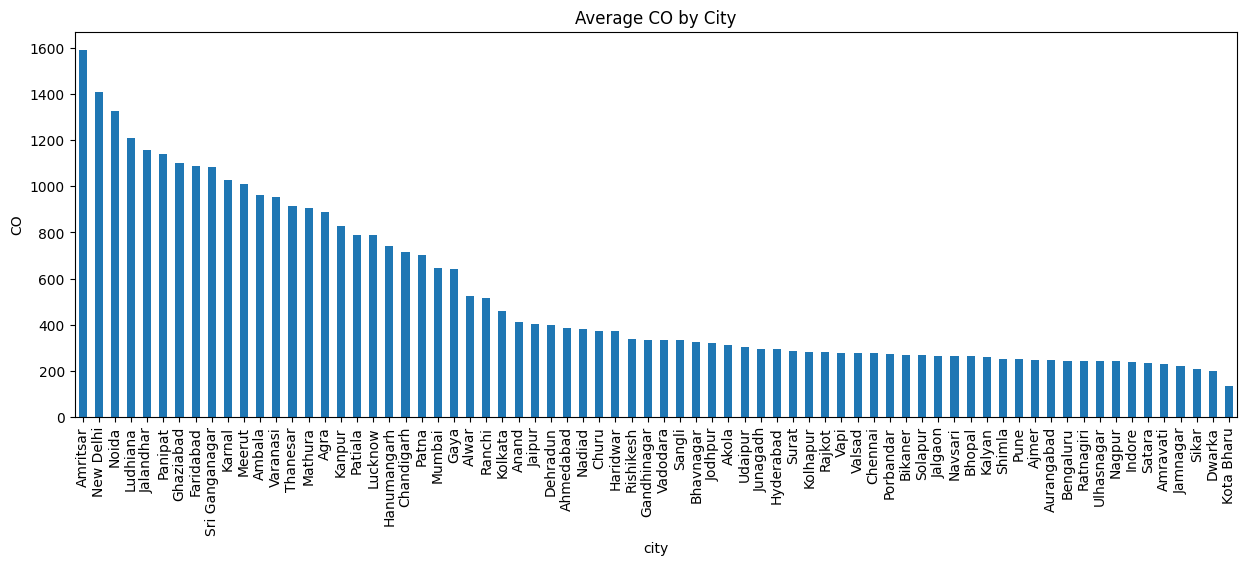

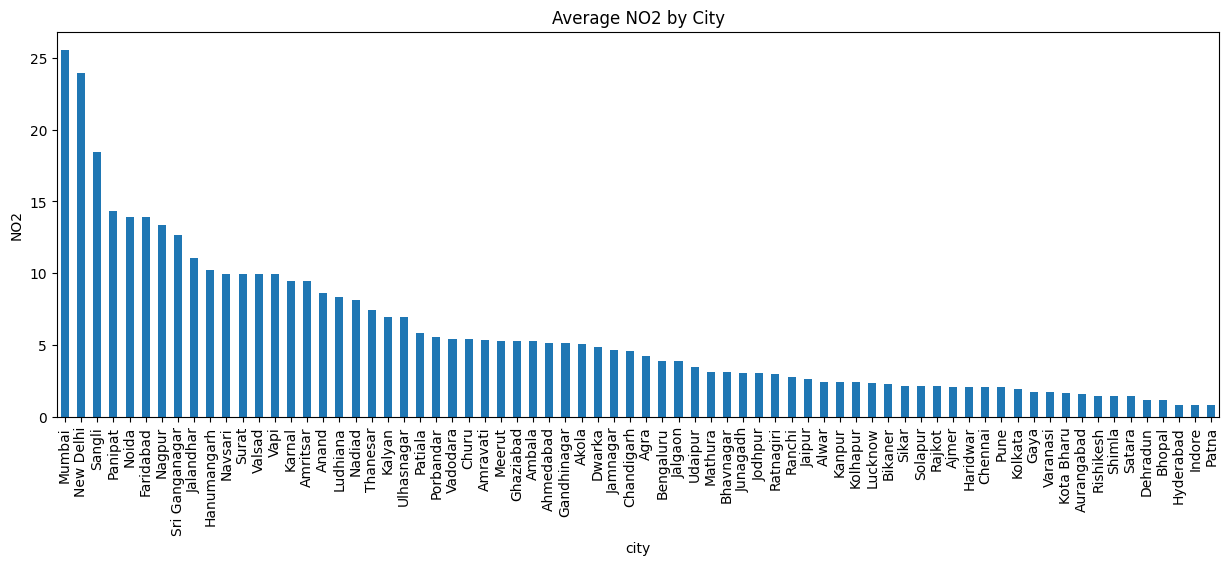

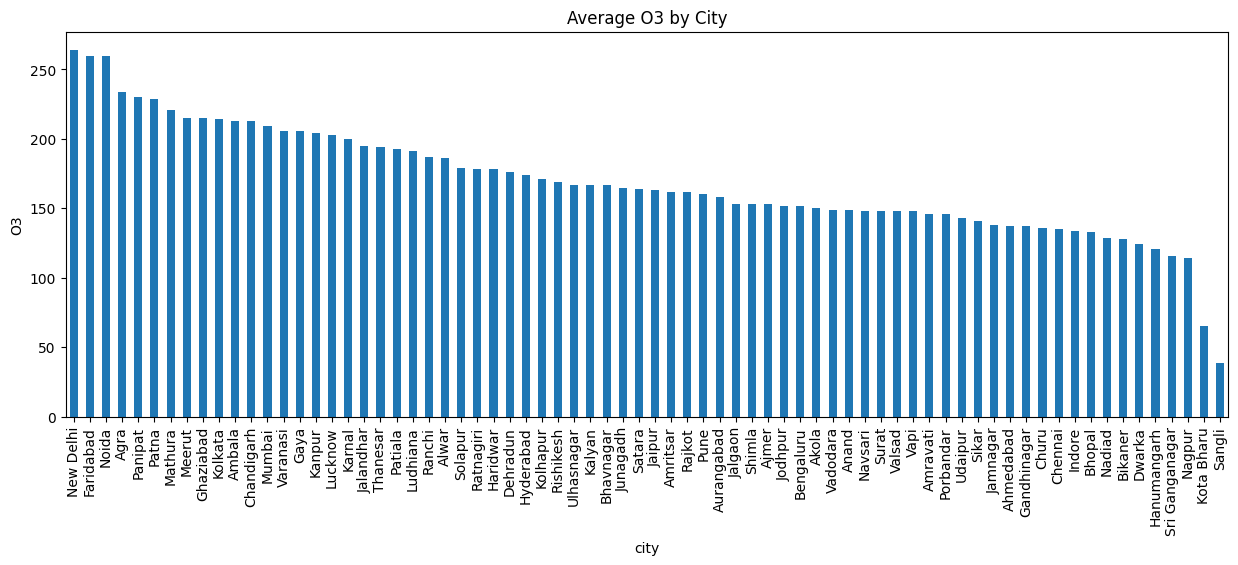

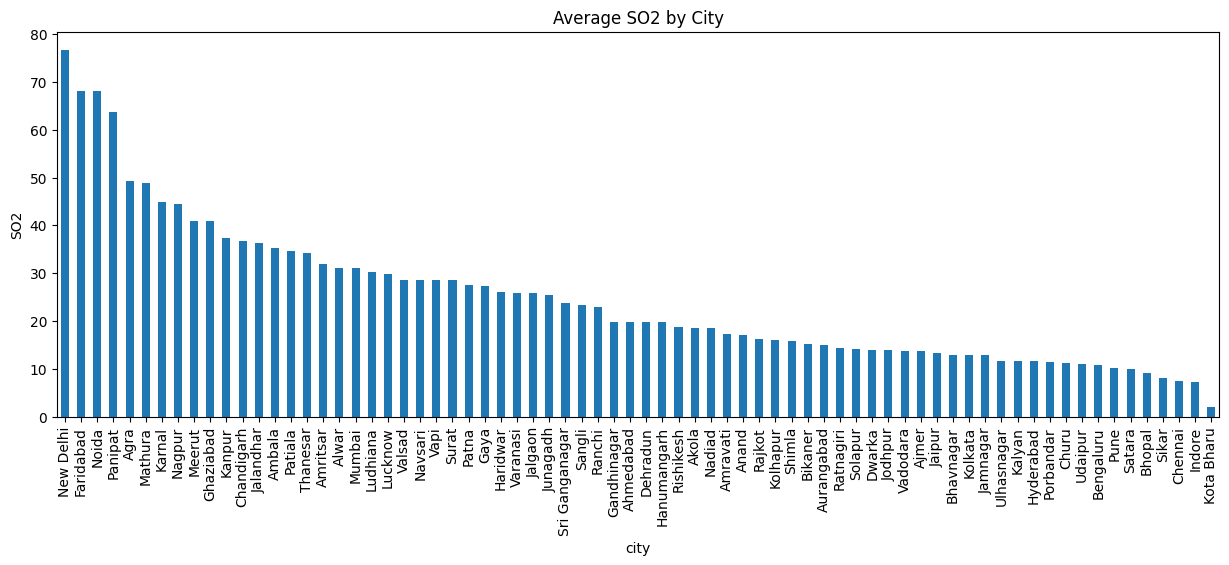

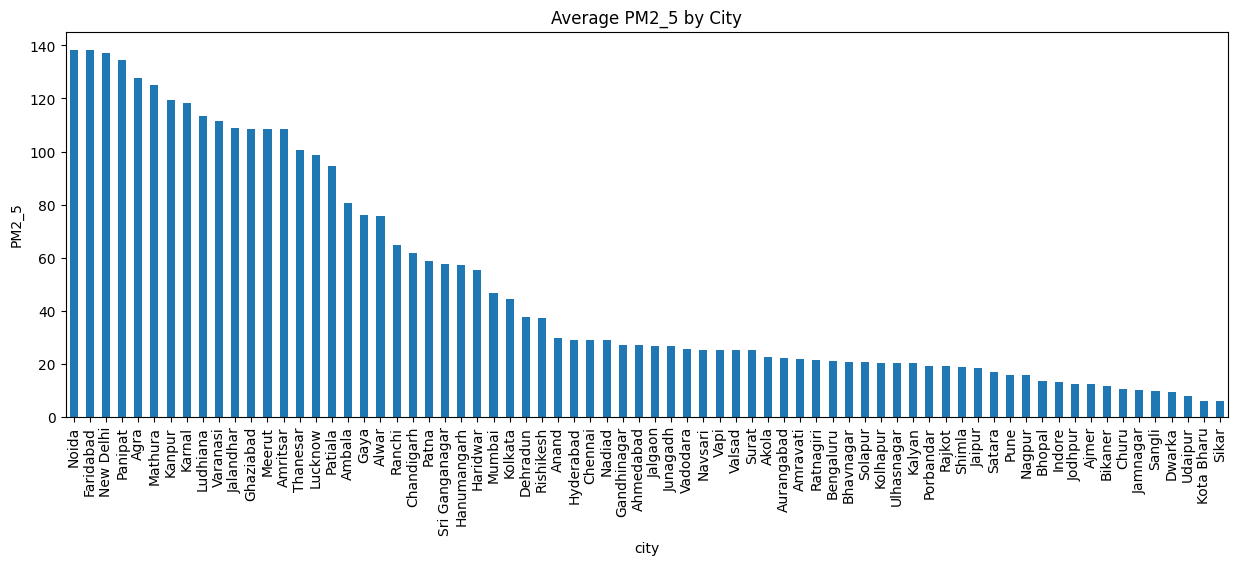

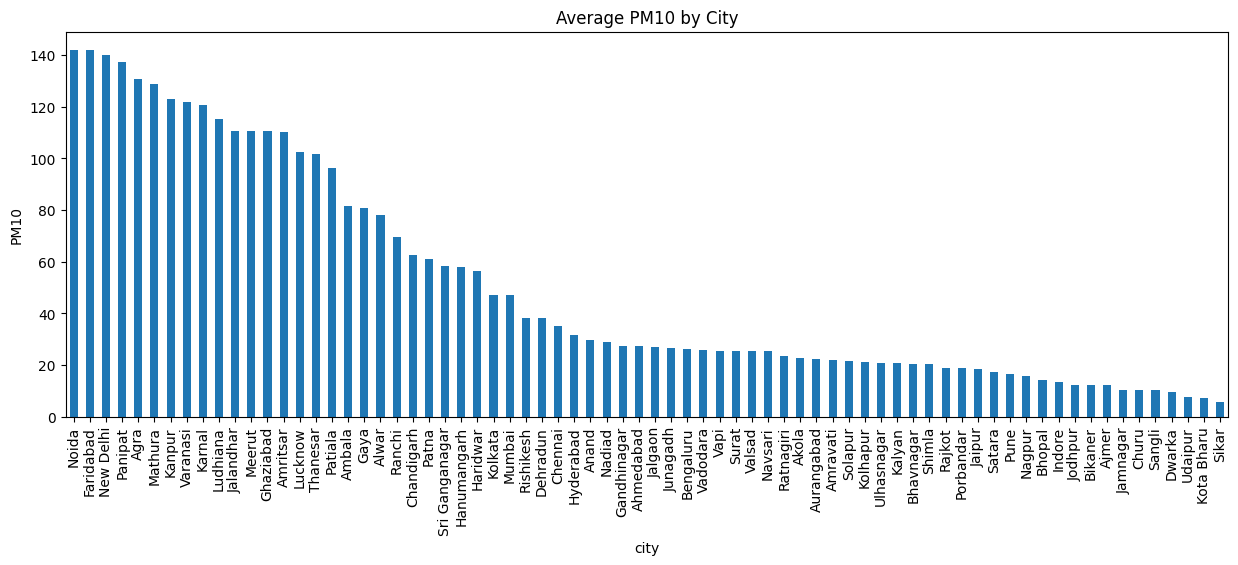

In [18]:
for col in pollutants:
    avg_pollutants[col].sort_values(ascending=False).plot(kind='bar', figsize=(15,5))
    plt.title(f"Average {col.upper()} by City")
    plt.ylabel(col.upper())
    plt.show()
